In [1]:
import os

# Change this to the folder where your project lives
os.chdir(r"C:\Users\PC\Desktop\DS projects\flu-shot-learning")

print("Current working directory:", os.getcwd())


Current working directory: C:\Users\PC\Desktop\DS projects\flu-shot-learning


In [2]:
# Import necessary Librariies 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")


In [3]:
# Load the datasets
train_features = pd.read_csv("data/training_set_features.csv")
train_labels   = pd.read_csv("data/training_set_labels.csv")
test_features  = pd.read_csv("data/test_set_features.csv")
# Look at the shapes
print("Train features shape:", train_features.shape)
print("Train labels shape:", train_labels.shape)
print("Test features shape:", test_features.shape)

Train features shape: (26707, 36)
Train labels shape: (26707, 3)
Test features shape: (26708, 36)


In [4]:
print("Train features columns:", train_features.columns[:5])
print("Train labels columns:", train_labels.columns)


Train features columns: Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance'],
      dtype='object')
Train labels columns: Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


In [5]:
# Check if IDs are aligned
aligned = (train_features["respondent_id"] == train_labels["respondent_id"]).all()
print("Are IDs aligned row by row?", aligned)
# If aligned, just concatenate
if aligned:
    train_df = pd.concat([train_features, train_labels.drop("respondent_id", axis=1)], axis=1)
else:
    # If not aligned, merge safely on respondent_id
    train_df = pd.merge(train_features, train_labels, on="respondent_id")

print("Merged training set shape:", train_df.shape)
train_df.head()

Are IDs aligned row by row? True
Merged training set shape: (26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
# Save merged train_df so it can be loaded elsewhere
train_df.to_csv("data/merged_train.csv", index=False)


## Initial Observations

- The training dataset contains **26,707 rows** and **38 columns**.  
- Columns include:  
  - **1 identifier**: respondent_id  
  - **36 features**: demographic, behavioral, and opinion-based variables  
  - **2 target variables**: h1n1_vaccine, seasonal_vaccine (both binary).  
- Features are a mix of **numeric** (e.g., h1n1_concern, household_adults) and **categorical** (e.g., employment_status, rent_or_own).  
- Several columns capture **preventive behaviors** (e.g., mask use, handwashing, avoiding gatherings).  
- Some columns (e.g., employment_industry, employment_occupation) have **missing values**.  
- The dataset covers a wide range of **demographics and household details**, useful for understanding vaccine uptake patterns.  


In [7]:
# Data types and non-null counts
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Observations from `.info()`
- 26,707 rows × 38 columns.  
- Mix of numeric (23), categorical (12), and ID/targets (3).  
- Targets (h1n1_vaccine, seasonal_vaccine) have no missing values.  
- respondent_id is an ID column (drop for modeling).  
- High missingness: health_insurance, employment_industry, employment_occupation.  
- Moderate missingness: education, marital_status, employment_status.  
- Most other columns have very few missing values.


In [8]:
# Missing value summary
missing = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(train_df) * 100).round(1)

missing_summary = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_percent
})

missing_summary.head(10)


,missing_count,missing_pct
employment_occupation,13470,50.4
employment_industry,13330,49.9
health_insurance,12274,46.0
income_poverty,4423,16.6
doctor_recc_h1n1,2160,8.1
doctor_recc_seasonal,2160,8.1
rent_or_own,2042,7.6
employment_status,1463,5.5
marital_status,1408,5.3
education,1407,5.3


### Missing Values
- health_insurance, employment_industry & employment_occupation =very high.  
- education, marital_status, employment_status  
- Most other variables have low missing values.  
- Target columns have no missing values.

In [9]:
# Separate numeric and categorical columns
num_cols = train_df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = train_df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

# Unique counts for categorical columns
uniq_counts = train_df[cat_cols].nunique().sort_values(ascending=False)
uniq_counts


Numeric columns: 26
Categorical columns: 12


employment_occupation    23
employment_industry      21
hhs_geo_region           10
age_group                 5
education                 4
race                      4
income_poverty            3
employment_status         3
census_msa                3
sex                       2
marital_status            2
rent_or_own               2
dtype: int64

### Column Types
- Numeric: 26 (includes ID + 2 targets)  
- Categorical: 12  
- For modeling: respondent_id(numeric ID) will be dropped; only 24 numeric features remain.
### Unique values

- Most categorical variables have low cardinality 2–5 values. Only employment_occupation and employment_industry have high cardinality, which may need grouping or special encoding.

In [10]:
# Class balance for each target
print("H1N1 vaccine uptake:")
print(train_df['h1n1_vaccine'].value_counts(normalize=True).map("{:.2%}".format))

print("\nSeasonal flu vaccine uptake:")
print(train_df['seasonal_vaccine'].value_counts(normalize=True).map("{:.2%}".format))

# Joint distribution (both vaccines together)
train_df[['h1n1_vaccine','seasonal_vaccine']].value_counts(normalize=True).head()


H1N1 vaccine uptake:
h1n1_vaccine
0    78.75%
1    21.25%
Name: proportion, dtype: object

Seasonal flu vaccine uptake:
seasonal_vaccine
0    53.44%
1    46.56%
Name: proportion, dtype: object


h1n1_vaccine  seasonal_vaccine
0             0                   0.497810
              1                   0.289737
1             1                   0.175871
              0                   0.036582
Name: proportion, dtype: float64

### Target Distribution
- H1N1 vaccine: Majority did not take it (class imbalance).  
- Seasonal flu vaccine: Uptake is higher than H1N1 but still less than half.  
- Joint distribution:Many individuals took neither vaccine; fewer took both.  
- Observation: Targets are imbalanced → need to consider balanced metrics (AUC, F1, precision-recall) and possibly resampling methods.


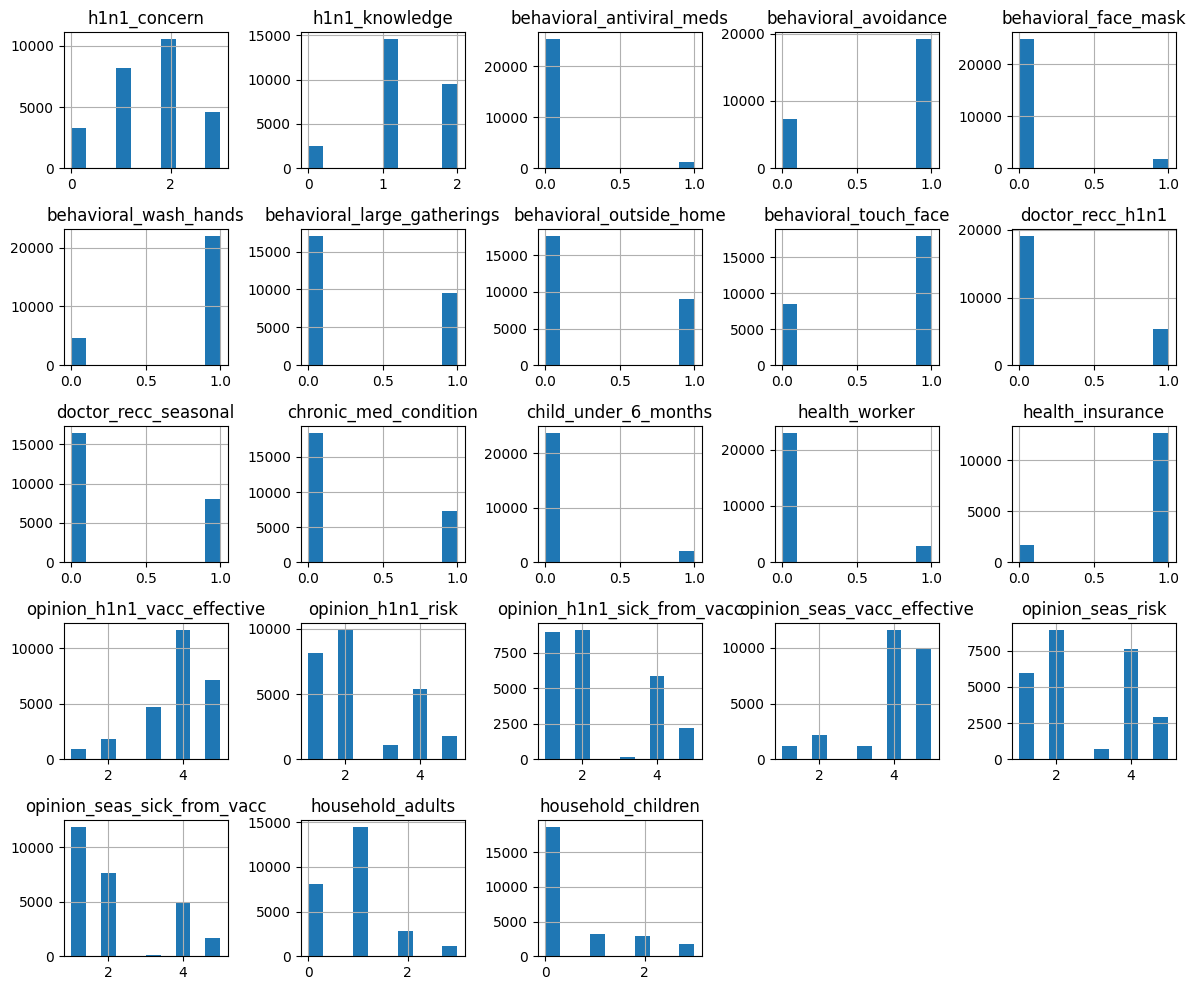

In [11]:
# Summary stats for numeric features (excluding ID and targets)
num_cols = train_df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["respondent_id", "h1n1_vaccine", "seasonal_vaccine"]]

# Descriptive stats
train_df[num_cols].describe().T


# Quick histograms for all numeric columns
train_df[num_cols].hist(figsize=(12, 10), bins=10)
plt.tight_layout()
plt.show()


### Numeric Summaries
- Most numeric features are discrete (e.g., concern levels, opinions, household counts).  
- Values fall within expected ranges (no extreme outliers).  
- Features like h1n1_concern and opinion_ appear ordinal (ordered categories).  
- Household features (household_adults, household_children) show small integer counts.  
- Observation: Numeric variables are mostly ordinal/categorical in nature, not continuous.


In [12]:
# Target rate by Categorical features
cat_cols = train_df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in cat_cols:
    print(f"\nColumn: {col}")
    
    # Value counts
    print("Counts:")
    print(train_df[col].value_counts(dropna=False))
    
    # H1N1 vaccine uptake
    print("\nH1N1 vaccine uptake by category:")
    print(train_df.groupby(col)['h1n1_vaccine'].mean().map("{:.2%}".format))
    
    # Seasonal vaccine uptake
    print("\nSeasonal vaccine uptake by category:")
    print(train_df.groupby(col)['seasonal_vaccine'].mean().map("{:.2%}".format))
    
    print("-"*50)



Column: age_group
Counts:
age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

H1N1 vaccine uptake by category:
age_group
18 - 34 Years    19.00%
35 - 44 Years    19.78%
45 - 54 Years    19.47%
55 - 64 Years    24.29%
65+ Years        22.67%
Name: h1n1_vaccine, dtype: object

Seasonal vaccine uptake by category:
age_group
18 - 34 Years    28.46%
35 - 44 Years    36.25%
45 - 54 Years    40.13%
55 - 64 Years    51.12%
65+ Years        67.37%
Name: seasonal_vaccine, dtype: object
--------------------------------------------------

Column: education
Counts:
education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NaN                  1407
Name: count, dtype: int64

H1N1 vaccine uptake by category:
education
12 Years            18.48%
< 12 Years          16.72%
College Graduate    24.59%
Some College        20.79%
Name: h1n1_vaccine, dtype: 

### Categorical Features vs Targets Observations
- Age group: Older individuals have higher uptake for both H1N1 and seasonal vaccines.  
- Education: College graduates show higher vaccination rates than less-educated groups.  
- Race: White and Hispanic groups have higher seasonal vaccine uptake; H1N1 uptake varies less.  
- Sex: Females slightly more likely to vaccinate than males.  
- Income & Employment: Higher income and being employed generally associated with higher vaccination rates.  
- Marital status & housing: Married and homeowners tend to have higher vaccine uptake.  
- Geography: HHS region and MSA show some variation, but differences are moderate.  
- Employment industry & occupation:** High-cardinality variables; some industries/occupations have much higher vaccination rates, suggesting predictive potential.  

-- These categorical features show meaningful patterns with vaccine uptake and will be useful for modeling. Rare categories may need grouping or encoding.


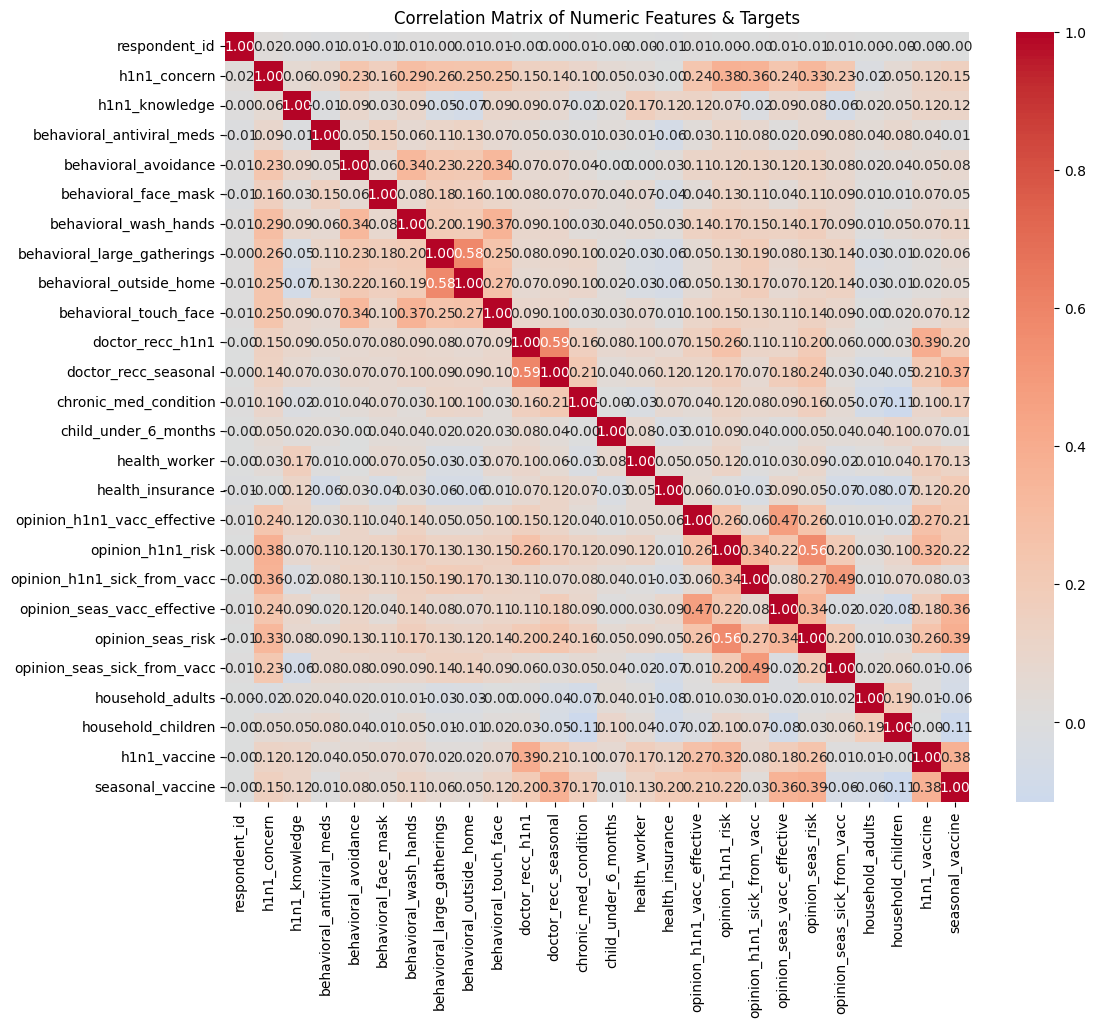

In [13]:

# Select numeric features including targets
num_cols = train_df.select_dtypes(include=["number"]).columns.tolist()

# Correlation matrix
corr_matrix = train_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Features & Targets")
plt.show()


### Numeric Feature Correlations
- Most numeric features are weakly correlated with each other (low multicollinearity).  
- h1n1_concern, h1n1_knowledge, and related opinion/behavioral variables show moderate correlation with h1n1_vaccine.  
- Seasonal vaccine uptake shows similar moderate correlations with opinion-related features.  
- No extremely high correlations (0.9) between predictors, so multicollinearity is not a major concern.  
- Observations guide feature selection for modeling.


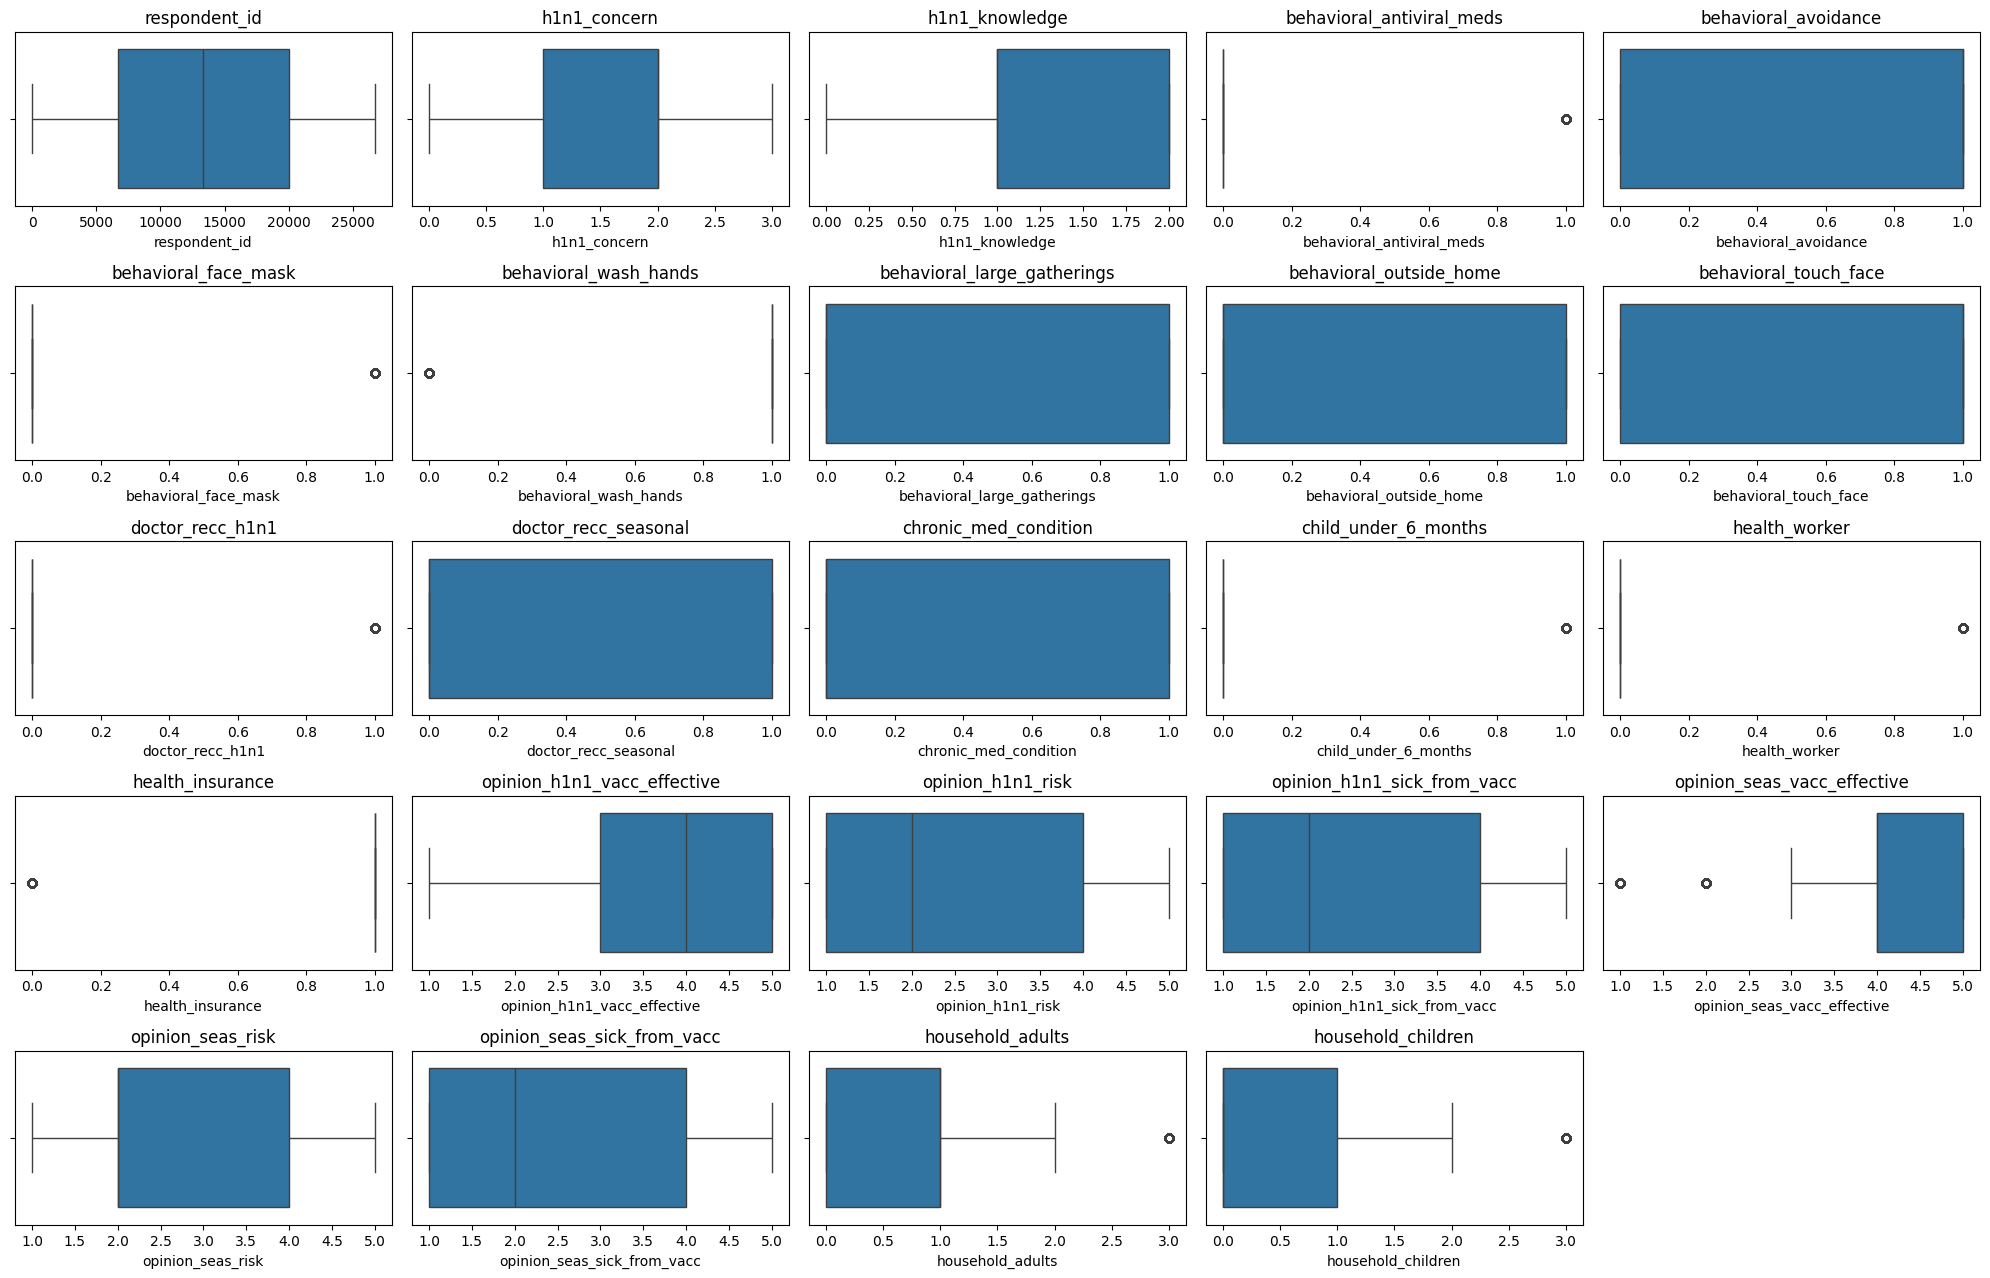

In [14]:
# Plot boxplots for all numeric columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(train_features.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(6, 5, i)  
    sns.boxplot(x=train_features[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:

for col in num_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_df[(train_df[col] < Q1 - 1.5*IQR) | (train_df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - Number of outliers: {outliers.shape[0]}")


respondent_id - Number of outliers: 0
h1n1_concern - Number of outliers: 0
h1n1_knowledge - Number of outliers: 0
behavioral_antiviral_meds - Number of outliers: 1301
behavioral_avoidance - Number of outliers: 0
behavioral_face_mask - Number of outliers: 1841
behavioral_wash_hands - Number of outliers: 4650
behavioral_large_gatherings - Number of outliers: 0
behavioral_outside_home - Number of outliers: 0
behavioral_touch_face - Number of outliers: 0
doctor_recc_h1n1 - Number of outliers: 5408
doctor_recc_seasonal - Number of outliers: 0
chronic_med_condition - Number of outliers: 0
child_under_6_months - Number of outliers: 2138
health_worker - Number of outliers: 2899
health_insurance - Number of outliers: 1736
opinion_h1n1_vacc_effective - Number of outliers: 0
opinion_h1n1_risk - Number of outliers: 0
opinion_h1n1_sick_from_vacc - Number of outliers: 0
opinion_seas_vacc_effective - Number of outliers: 3427
opinion_seas_risk - Number of outliers: 0
opinion_seas_sick_from_vacc - Numb

In [16]:
# List of numeric columns to cap (exclude IDs and target columns)
num_cols = train_df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["respondent_id", "h1n1_vaccine", "seasonal_vaccine"]]

# Dictionary to track columns capped
capped_columns = {}

# Cap each column at 1st and 99th percentiles
for col in num_cols:
    lower = train_df[col].quantile(0.01)
    upper = train_df[col].quantile(0.99)
    
    # Only cap if there are values outside the bounds
    if (train_df[col] < lower).any() or (train_df[col] > upper).any():
        capped_columns[col] = {"lower": lower, "upper": upper}
        train_df[col] = train_df[col].clip(lower, upper)

# Report columns that were capped
print("Columns capped at 1st and 99th percentiles:")
for col, bounds in capped_columns.items():
    print(f"{col}: lower={bounds['lower']}, upper={bounds['upper']}")


Columns capped at 1st and 99th percentiles:


In [17]:
# List of numeric columns to cap based on previous outlier analysis
capped_cols = [
    'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_wash_hands',
    'doctor_recc_h1n1', 'child_under_6_months', 'health_worker', 
    'health_insurance', 'opinion_seas_vacc_effective', 
    'household_adults', 'household_children', 'h1n1_vaccine'
]

# Dictionary to store the lower and upper bounds for each capped column
capped_summary = {}

for col in capped_cols:
    lower = train_df[col].quantile(0.01)
    upper = train_df[col].quantile(0.99)
    
    # Cap the outliers
    train_df[col] = train_df[col].clip(lower, upper)
    
    # Save the bounds
    capped_summary[col] = {"lower": lower, "upper": upper}

# Report
print("Columns capped at 1st and 99th percentiles:")
for col, bounds in capped_summary.items():
    print(f"{col}: lower={bounds['lower']}, upper={bounds['upper']}")


Columns capped at 1st and 99th percentiles:
behavioral_antiviral_meds: lower=0.0, upper=1.0
behavioral_face_mask: lower=0.0, upper=1.0
behavioral_wash_hands: lower=0.0, upper=1.0
doctor_recc_h1n1: lower=0.0, upper=1.0
child_under_6_months: lower=0.0, upper=1.0
health_worker: lower=0.0, upper=1.0
health_insurance: lower=0.0, upper=1.0
opinion_seas_vacc_effective: lower=1.0, upper=5.0
household_adults: lower=0.0, upper=3.0
household_children: lower=0.0, upper=3.0
h1n1_vaccine: lower=0.0, upper=1.0


In [18]:
# Save missing and basic stats for later reference
pd.DataFrame({"missing_count": missing, "missing_pct": missing_percent}).to_csv("outputs/missing_summary.csv")
train_df[num_cols].describe().T.to_csv("outputs/numeric_summary.csv")
